<a href="https://colab.research.google.com/github/rachmazamalia/TugasPython/blob/main/Tugas_Python_11_Rachma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [78]:
cd /content/drive/MyDrive/TugasPython2

/content/drive/MyDrive/TugasPython2


In [79]:
ls

dataset@


In [80]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [83]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("dataset")
data = []
labels = []

[INFO] loading images...


In [84]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
	image = np.array(image.resize((64, 64))) / 255.0
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [85]:
print(labels)

['GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09',

In [86]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [87]:
print(labels)

[[0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


In [88]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(435, 64, 64, 3)
(146, 64, 64, 3)


In [89]:
from keras.layers import Convolution2D, MaxPool2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(64, (5,5), activation='relu', input_shape=(64,64,3)))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(32, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 60, 60, 64)        4864      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 28, 28, 32)        18464     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 12, 12, 16)        4624      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 576)             

In [90]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [91]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=64)

Epoch 1/25
7/7 [==============================] - 3s 449ms/step - loss: 1.5984 - accuracy: 0.2759 - val_loss: 1.5829 - val_accuracy: 0.2329
Epoch 2/25
7/7 [==============================] - 3s 431ms/step - loss: 1.5533 - accuracy: 0.3057 - val_loss: 1.5377 - val_accuracy: 0.3014
Epoch 3/25
7/7 [==============================] - 3s 438ms/step - loss: 1.4469 - accuracy: 0.3816 - val_loss: 1.4240 - val_accuracy: 0.3699
Epoch 4/25
7/7 [==============================] - 3s 444ms/step - loss: 1.3220 - accuracy: 0.4322 - val_loss: 1.3153 - val_accuracy: 0.3904
Epoch 5/25
7/7 [==============================] - 3s 414ms/step - loss: 1.2098 - accuracy: 0.4713 - val_loss: 1.2646 - val_accuracy: 0.4178
Epoch 6/25
7/7 [==============================] - 3s 420ms/step - loss: 1.1344 - accuracy: 0.5264 - val_loss: 1.1100 - val_accuracy: 0.5000
Epoch 7/25
7/7 [==============================] - 3s 416ms/step - loss: 0.9563 - accuracy: 0.6023 - val_loss: 0.9731 - val_accuracy: 0.6233
Epoch 8/25
7/7 [====

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


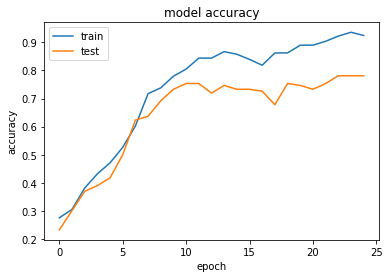

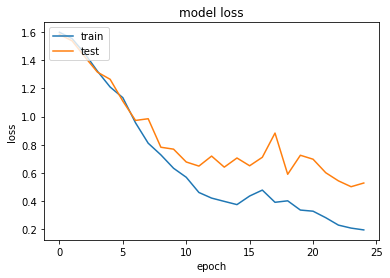

In [93]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [94]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_08       0.84      0.90      0.87        29
      GMB_09       0.81      0.91      0.86        23
      GMB_10       0.67      0.69      0.68        35
      GMB_11       0.69      0.61      0.65        33
      nonGMB       0.96      0.88      0.92        26

    accuracy                           0.78       146
   macro avg       0.79      0.80      0.79       146
weighted avg       0.78      0.78      0.78       146

